In [85]:
import nltk
import requests
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from collections import Counter
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import spacy
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [86]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load spaCy's small English model
nlp = spacy.load("en_core_web_sm")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


* Using requests to access the contents online, create a function load_texts().This function should recive a list of urls, load them, clean non-words using regular expressions and append the cleaned text to the corpus that will be returned.

In [87]:
# URLs of the books
urls = [
    "https://www.gutenberg.org/files/11/11-0.txt",  # Alice’s Adventures in Wonderland
    "https://www.gutenberg.org/files/12/12-0.txt",  # Through the Looking-Glass
    "https://www.gutenberg.org/files/851/851-0.txt"  # A Tangled Tale
]


In [7]:
def load_texts(urls):
    corpus = []
    for url in urls:
        response = requests.get(url)
        text = response.text

        # Remove non-word characters and digits
        text = re.sub(r'[^A-Za-z\s]', '', text)
        corpus.append(text)
    return corpus


In [14]:
books = load_texts(urls)
print(type(books))
print(len(books))

<class 'list'>
3


print the first 200 characteres of each text.
Are there parts of the text that are not relevant to the analysis? If so, you need to remove them.
hint:* you can use slicing to start and stop the text where you need (ignoring autoral credits in the begining and end) looking for the following phrases:
‘ START’
‘*** END’

In [15]:
for i, book in enumerate(books):
    for i, book in enumerate(books):
        print(f"Book {i+1} (First 200 characters):\n", book[:200], "\n")

Book 1 (First 200 characters):
  START OF THE PROJECT GUTENBERG EBOOK  
Illustration




Alices Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 

Contents

 

Book 2 (First 200 characters):
  START OF THE PROJECT GUTENBERG EBOOK  
Illustration




THROUGH THE LOOKINGGLASS

And What Alice Found There

By Lewis Carroll

The Millennium Fulcrum Edition 




DRAMATIS PERSON
A 

Book 3 (First 200 characters):
 DOCTYPE html
html classclientnojs langen dirltr
head
 meta charsetUTF

title  Project Gutenbergtitle
 link relstylesheet hrefgutenbergstylecssv
 link relstylesheet hrefgutenbergcollapsiblecss
 link re 

Book 1 (First 200 characters):
  START OF THE PROJECT GUTENBERG EBOOK  
Illustration




Alices Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 

Contents

 

Book 2 (First 200 characters):
  START OF THE PROJECT GUTENBERG EBOOK  
Illustration




THROUGH THE LOOKINGGLASS

And What Alice Found There

By Lewis Carroll

The Millennium 

Afin de retirer les partie du texte non pertiente, nous allons repérer les partie commençons pas "START ou "END".  Pour cela, nous allons decomposer le texte en liste de lignes et supprimeront les lignes commencant pas Start ou End.

* Split the text into a list of lines

*  Find the end of the main content

*   Extract only the relevant content (between "START" and "END")

In [17]:
def clean_books(text):
    """
    Cleans a book's text by removing unnecessary metadata before and after the main content.

    Args:
        text (str): The full raw text of the book.

    Returns:
        str: The cleaned book content, without metadata or irrelevant information.
    """

    # Each line is separated by a newline character ("\n")
    lines = text.split("\n")


    # This searches for the first line containing "START"
    # If found, `start_index` stores its index; otherwise, it remains -1
    start_index = next((i for i, line in enumerate(lines) if "START" in line), -1)


    # This searches for the first line containing "END"
    # If found, `end_index` stores its index; otherwise, it remains -1
    end_index = next((i for i, line in enumerate(lines) if "END" in line), -1)

    #
    if start_index != -1 and end_index != -1:
        # Joins all lines between the start and end markers into a single text
        clean_text = "\n".join(lines[start_index+1:end_index])
    else:
        # If no markers were found, keep the full text as is
        clean_text = text

    return clean_text

In [18]:
clean_books_list = [clean_books(book) for book in books]
print(clean_books_list[0][:200])

Illustration




Alices Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 

Contents

 CHAPTER I     Down the RabbitHole
 CHAPTER II    The Pool of Tears
 CHAPT


#### Tockenization

In [21]:
nltk.download('punkt_tab', force=True)
books_tokens = [word_tokenize(book.lower()) for book in clean_books_list]

for i, book in enumerate(books_tokens):
    print(f"Book {i+1} (First 20 tokens):\n", book[:150], "\n")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Book 1 (First 20 tokens):
 ['illustration', 'alices', 'adventures', 'in', 'wonderland', 'by', 'lewis', 'carroll', 'the', 'millennium', 'fulcrum', 'edition', 'contents', 'chapter', 'i', 'down', 'the', 'rabbithole', 'chapter', 'ii', 'the', 'pool', 'of', 'tears', 'chapter', 'iii', 'a', 'caucusrace', 'and', 'a', 'long', 'tale', 'chapter', 'iv', 'the', 'rabbit', 'sends', 'in', 'a', 'little', 'bill', 'chapter', 'v', 'advice', 'from', 'a', 'caterpillar', 'chapter', 'vi', 'pig', 'and', 'pepper', 'chapter', 'vii', 'a', 'mad', 'teaparty', 'chapter', 'viii', 'the', 'queens', 'croquetground', 'chapter', 'ix', 'the', 'mock', 'turtles', 'story', 'chapter', 'x', 'the', 'lobster', 'quadrille', 'chapter', 'xi', 'who', 'stole', 'the', 'tarts', 'chapter', 'xii', 'alices', 'evidence', 'chapter', 'i', 'down', 'the', 'rabbithole', 'alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', 'and', 'of', 'having', 'nothing', 'to', 'do', 'once', 'or',

#### Remove Stop Words

In [29]:
stop_words = set(stopwords.words('english'))
books_tokens_cleaned = [[word for word in tokens if word not in stop_words] for tokens in books_tokens]

for i, book_cleaned in enumerate(books_tokens_cleaned):
    print(f"\n book {i+1} - Cheking Stopword Removal")

    for stopword in stop_words:
        count = book_cleaned.count(stopword)
        print(f" '{stopword}' appears {count} times in Book {i+1}")


 book 1 - Cheking Stopword Removal
 'out' appears 0 times in Book 1
 'mightn't' appears 0 times in Book 1
 'when' appears 0 times in Book 1
 'itself' appears 0 times in Book 1
 'under' appears 0 times in Book 1
 'we'll' appears 0 times in Book 1
 'me' appears 0 times in Book 1
 'other' appears 0 times in Book 1
 'am' appears 0 times in Book 1
 'll' appears 0 times in Book 1
 'here' appears 0 times in Book 1
 've' appears 0 times in Book 1
 'didn't' appears 0 times in Book 1
 'during' appears 0 times in Book 1
 'he' appears 0 times in Book 1
 'had' appears 0 times in Book 1
 'i'm' appears 0 times in Book 1
 'ma' appears 0 times in Book 1
 'themselves' appears 0 times in Book 1
 'no' appears 0 times in Book 1
 'we've' appears 0 times in Book 1
 'an' appears 0 times in Book 1
 'your' appears 0 times in Book 1
 'have' appears 0 times in Book 1
 'this' appears 0 times in Book 1
 'few' appears 0 times in Book 1
 'shouldn't' appears 0 times in Book 1
 'any' appears 0 times in Book 1
 'whom' 

Verify removing Stop Words

In [30]:
stopwords_to_check = {"i", "me", "my", "myself", "we", "our", "ours", "ourselves"}
for i, book_cleaned in enumerate(books_tokens_cleaned):
    print(f"\n book {i+1} - Cheking Stopword Removal")

    for stopword in stopwords_to_check:
        count = book_cleaned.count(stopword)
        print(f" '{stopword}' appears {count} times in Book {i+1}")


 book 1 - Cheking Stopword Removal
 'my' appears 0 times in Book 1
 'myself' appears 0 times in Book 1
 'we' appears 0 times in Book 1
 'me' appears 0 times in Book 1
 'ours' appears 0 times in Book 1
 'ourselves' appears 0 times in Book 1
 'i' appears 0 times in Book 1
 'our' appears 0 times in Book 1

 book 2 - Cheking Stopword Removal
 'my' appears 0 times in Book 2
 'myself' appears 0 times in Book 2
 'we' appears 0 times in Book 2
 'me' appears 0 times in Book 2
 'ours' appears 0 times in Book 2
 'ourselves' appears 0 times in Book 2
 'i' appears 0 times in Book 2
 'our' appears 0 times in Book 2

 book 3 - Cheking Stopword Removal
 'my' appears 0 times in Book 3
 'myself' appears 0 times in Book 3
 'we' appears 0 times in Book 3
 'me' appears 0 times in Book 3
 'ours' appears 0 times in Book 3
 'ourselves' appears 0 times in Book 3
 'i' appears 0 times in Book 3
 'our' appears 0 times in Book 3


#### Steaming Tokens using PorterStemmer

In [32]:
# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Apply stemming to each book and extract the first 50 stemmed tokens
books_stemmed = [[stemmer.stem(word) for word in book] for book in books_tokens_cleaned]

# Print the first 50 stemmed words of each book
for i, book in enumerate(books_stemmed):
    print(f"\n Book {i+1} - First 50 Stemmed Tokens:\n", book[:50], "\n")


 Book 1 - First 50 Stemmed Tokens:
 ['illustr', 'alic', 'adventur', 'wonderland', 'lewi', 'carrol', 'millennium', 'fulcrum', 'edit', 'content', 'chapter', 'rabbithol', 'chapter', 'ii', 'pool', 'tear', 'chapter', 'iii', 'caucusrac', 'long', 'tale', 'chapter', 'iv', 'rabbit', 'send', 'littl', 'bill', 'chapter', 'v', 'advic', 'caterpillar', 'chapter', 'vi', 'pig', 'pepper', 'chapter', 'vii', 'mad', 'teaparti', 'chapter', 'viii', 'queen', 'croquetground', 'chapter', 'ix', 'mock', 'turtl', 'stori', 'chapter', 'x'] 


 Book 2 - First 50 Stemmed Tokens:
 ['illustr', 'lookingglass', 'alic', 'found', 'lewi', 'carrol', 'millennium', 'fulcrum', 'edit', 'dramati', 'person', 'arrang', 'commenc', 'game', 'white', 'red', 'piec', 'pawn', 'pawn', 'piec', 'tweedlede', 'daisi', 'daisi', 'humpti', 'dumpti', 'unicorn', 'haigha', 'messeng', 'carpent', 'sheep', 'oyster', 'oyster', 'walru', 'w', 'queen', 'lili', 'tigerlili', 'r', 'queen', 'w', 'king', 'fawn', 'rose', 'r', 'king', 'age', 'man', 'oyster', 'oys

#### Lemmatization using spaCy

In [33]:
# Load the small English language model from spaCy
nlp = spacy.load("en_core_web_sm")

# Apply lemmatization to each book and extract the first 50 lemmatized tokens
books_lemmatized = [[token.lemma_ for token in nlp(" ".join(book))] for book in books_tokens_cleaned]

# Print the first 50 lemmatized words of each book
for i, book in enumerate(books_lemmatized):
    print(f"\n Book {i+1} - First 50 Lemmatized Tokens:\n", book[:50], "\n")


 Book 1 - First 50 Lemmatized Tokens:
 ['illustration', 'alice', 'adventure', 'wonderland', 'lewis', 'carroll', 'millennium', 'fulcrum', 'edition', 'content', 'chapter', 'rabbithole', 'chapter', 'ii', 'pool', 'tear', 'chapter', 'iii', 'caucusrace', 'long', 'tale', 'chapter', 'iv', 'rabbit', 'send', 'little', 'bill', 'chapter', 'v', 'advice', 'caterpillar', 'chapter', 'vi', 'pig', 'pepper', 'chapter', 'vii', 'mad', 'teaparty', 'chapter', 'viii', 'queen', 'croquetground', 'chapter', 'ix', 'mock', 'turtle', 'story', 'chapter', 'x'] 


 Book 2 - First 50 Lemmatized Tokens:
 ['illustration', 'lookingglass', 'alice', 'find', 'lewis', 'carroll', 'millennium', 'fulcrum', 'edition', 'dramatis', 'person', 'arrange', 'commencement', 'game', 'white', 'red', 'piece', 'pawn', 'pawn', 'piece', 'tweedledee', 'daisy', 'daisy', 'humpty', 'dumpty', 'unicorn', 'haigha', 'messenger', 'carpenter', 'sheep', 'oyster', 'oyster', 'walrus', 'w', 'queen', 'lily', 'tigerlily', 'r', 'queen', 'w', 'king', 'fawn', '

#### Comparing Stemmed vs Lemmatized Tokens

In [34]:
# Compare the first 20 words of stemming and lemmatization from Book 1
print(" Comparing Stemming vs Lemmatization (Book 1)")

for stemmed, lemmatized in zip(books_stemmed[0][:20], books_lemmatized[0][:20]):
    print(f"Stemmed: {stemmed}  |  Lemmatized: {lemmatized}")


 Comparing Stemming vs Lemmatization (Book 1)
Stemmed: illustr  |  Lemmatized: illustration
Stemmed: alic  |  Lemmatized: alice
Stemmed: adventur  |  Lemmatized: adventure
Stemmed: wonderland  |  Lemmatized: wonderland
Stemmed: lewi  |  Lemmatized: lewis
Stemmed: carrol  |  Lemmatized: carroll
Stemmed: millennium  |  Lemmatized: millennium
Stemmed: fulcrum  |  Lemmatized: fulcrum
Stemmed: edit  |  Lemmatized: edition
Stemmed: content  |  Lemmatized: content
Stemmed: chapter  |  Lemmatized: chapter
Stemmed: rabbithol  |  Lemmatized: rabbithole
Stemmed: chapter  |  Lemmatized: chapter
Stemmed: ii  |  Lemmatized: ii
Stemmed: pool  |  Lemmatized: pool
Stemmed: tear  |  Lemmatized: tear
Stemmed: chapter  |  Lemmatized: chapter
Stemmed: iii  |  Lemmatized: iii
Stemmed: caucusrac  |  Lemmatized: caucusrace
Stemmed: long  |  Lemmatized: long


#### Part-of-Speech (POS)Tagging using NLTK

In [37]:
from nltk import pos_tag

nltk.download('averaged_perceptron_tagger_eng')

# Apply POS tagging to each book
books_pos_tags = [pos_tag(book) for book in books_tokens_cleaned]

# Print the first 30 POS-tagged words of each book
for i, book in enumerate(books_pos_tags):
    print(f"\n Book {i+1} - First 30 POS Tagged Tokens:\n", book[:30], "\n")

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.



 Book 1 - First 30 POS Tagged Tokens:
 [('illustration', 'NN'), ('alices', 'NNS'), ('adventures', 'VBZ'), ('wonderland', 'VBP'), ('lewis', 'JJ'), ('carroll', 'NN'), ('millennium', 'NN'), ('fulcrum', 'NN'), ('edition', 'NN'), ('contents', 'NNS'), ('chapter', 'NN'), ('rabbithole', 'VBP'), ('chapter', 'NN'), ('ii', 'NN'), ('pool', 'NN'), ('tears', 'NNS'), ('chapter', 'NN'), ('iii', 'VBP'), ('caucusrace', 'NN'), ('long', 'JJ'), ('tale', 'NN'), ('chapter', 'NN'), ('iv', 'JJ'), ('rabbit', 'NN'), ('sends', 'VBZ'), ('little', 'JJ'), ('bill', 'NN'), ('chapter', 'NN'), ('v', 'NN'), ('advice', 'NN')] 


 Book 2 - First 30 POS Tagged Tokens:
 [('illustration', 'NN'), ('lookingglass', 'NN'), ('alice', 'NN'), ('found', 'VBD'), ('lewis', 'JJ'), ('carroll', 'NN'), ('millennium', 'NN'), ('fulcrum', 'NN'), ('edition', 'NN'), ('dramatis', 'NN'), ('person', 'NN'), ('arranged', 'VBD'), ('commencement', 'JJ'), ('game', 'NN'), ('white', 'JJ'), ('red', 'JJ'), ('pieces', 'NNS'), ('pawns', 'VBP'), ('pawns', 'N

#### Named Entity Recognition (NER) using NLTK

In [41]:
from nltk.chunk import ne_chunk
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

# Apply Named Entity Recognition (NER) to each book
books_named_entities = [ne_chunk(pos_tag(book)) for book in books_tokens_cleaned]

# Print the first 10 named entities of each book
for i, book in enumerate(books_named_entities):
    print(f"\n Book {i+1} - First 10 Named Entities:\n", book[:10], "\n")


[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!



 Book 1 - First 10 Named Entities:
 [('illustration', 'NN'), ('alices', 'NNS'), ('adventures', 'VBZ'), ('wonderland', 'VBP'), ('lewis', 'JJ'), ('carroll', 'NN'), ('millennium', 'NN'), ('fulcrum', 'NN'), ('edition', 'NN'), ('contents', 'NNS')] 


 Book 2 - First 10 Named Entities:
 [('illustration', 'NN'), ('lookingglass', 'NN'), ('alice', 'NN'), ('found', 'VBD'), ('lewis', 'JJ'), ('carroll', 'NN'), ('millennium', 'NN'), ('fulcrum', 'NN'), ('edition', 'NN'), ('dramatis', 'NN')] 


 Book 3 - First 10 Named Entities:
 [('doctype', 'NN'), ('html', 'NN'), ('html', 'NN'), ('classclientnojs', 'NN'), ('langen', 'NN'), ('dirltr', 'JJ'), ('head', 'NN'), ('meta', 'NN'), ('charsetutf', 'NN'), ('title', 'NN')] 



# Analysing The Text

### 1. Generate Word Clouds for Each Book

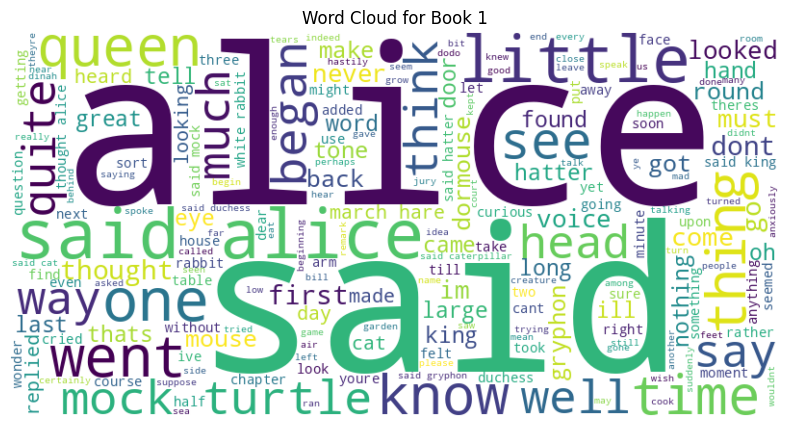

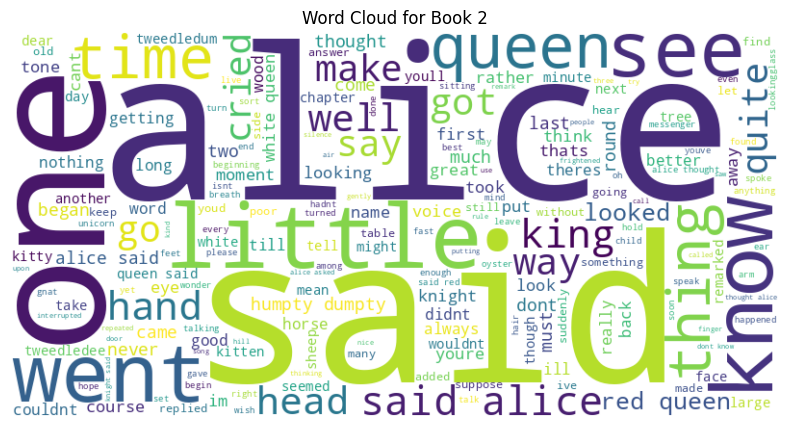

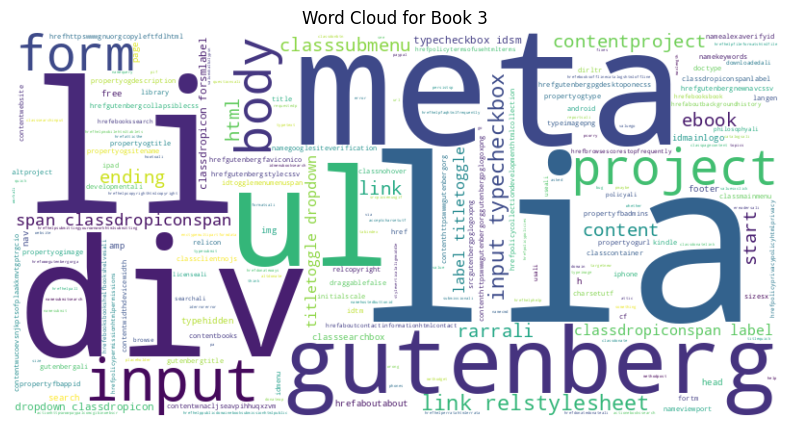

In [42]:
# WordCloud generation
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

for i, book in enumerate(books_tokens_cleaned):
    generate_wordcloud(book, f"Word Cloud for Book {i+1}")


We can see that the most frequent word in each book is:

- Book 1 → The largest word is 'alice'
- Book 2 → The largest word is 'alice'
- Book 3 → The largest word is 'lia'

#### 2. BoW method to check the five most frequent words in all the books.

We will use the Bag of Words (BoW) model with scikit-learn's CountVectorizer to analyze word frequency in books. This method transforms text data into a numerical representation, where each unique word is counted across the entire corpus. The five most frequent words will be identified based on their occurrence in the dataset.


In [48]:
# Convert lemmatized tokens back to text (Best Preprocessed Text)
books_lemmatized_text = [" ".join(book) for book in books_lemmatized]

# Create BoW using CountVectorizer
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(books_lemmatized_text)

# Convert to DataFrame for better visualization
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

Print the BoW and identify the numbers

In [88]:
# Display the BoW matrix (show first 10 words)
print("\n First 10 words in BoW matrix:")
print(bow_df.iloc[:, :10].head())  # Display first few rows and columns


 First 10 words in BoW matrix:
   abide  able  aboutand  aboutrather  aboutwhenever  absence  absurd  accent  \
0      1     1         0            0              0        1       2       0   
1      0     6         1            1              1        0       0       1   
2      0     0         0            0              0        0       0       0   

   acceptance  acceptcharsetutf  
0           1                 0  
1           0                 0  
2           0                 1  


In [90]:
# Sum occurrences of each word across all books
word_freq = bow_df.sum(axis=0)

# Sort words by frequency (descending order)
top_words = word_freq.sort_values(ascending=False).head(5)

# Convert to DataFrame for visualization
top_words_df = pd.DataFrame(top_words, columns=["Frequency"])

# Display results
print("\n Top 5 Most Frequent Words:")
print(top_words_df)


 Top 5 Most Frequent Words:
       Frequency
say         1069
alice        860
not          535
go           333
queen        273


5.
* Display a pie plot of the 5 most frequent words in the text.

* Add the word and its frequence as labels.

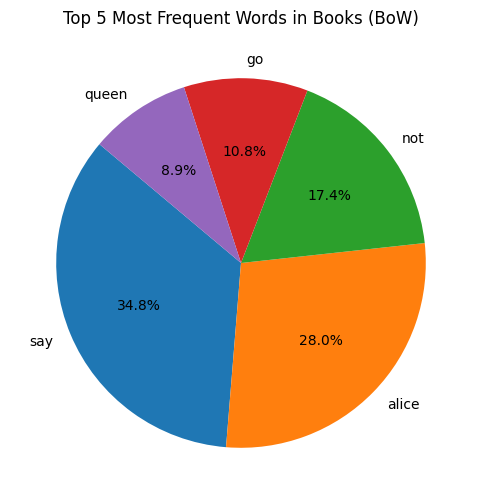

In [91]:
# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(top_words, labels=top_words.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Most Frequent Words in Books (BoW)")
plt.show()


5.Analyse the outputs: Are those words informative? Are they insightful or expected?

High-frequency words, such as “say,” “alice,” and “queen,” are expected given the context of the books. However, high-frequency words like “don’t” or “go” may be less revealing because they are common in everyday language. While BoW helps identify recurring terms, it does not consider the importance or meaning of the words in the text, which is why TF-IDF is often used for more in-depth analyses.


#### Solving the frequency problem using TF-IDF

1. Create another BoW, now using TF-IDF as vectorizer.

hint: You need to pass min_df=1, max_df=2 as arguments of the TfidfVectorizer(), because we are using a small dataset.

In [64]:
# Convert lemmatized tokens back to text
books_lemmatized_text = [" ".join(book) for book in books_lemmatized]

# Apply TF-IDF Vectorizer with recommended parameters
tfidf_vectorizer = TfidfVectorizer(min_df=1, max_df=2)
tfidf_matrix = tfidf_vectorizer.fit_transform(books_lemmatized_text)

# Extract feature names (words)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert to DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF matrix (show first 10 words)
print("\n First 10 words in TF-IDF matrix:")
print(tfidf_df.iloc[:, :10].head())  # Display first few rows and columns


 First 10 words in TF-IDF matrix:
      abide      able  aboutand  aboutrather  aboutwhenever   absence  \
0  0.001467  0.001116  0.000000     0.000000       0.000000  0.001467   
1  0.000000  0.005837  0.001279     0.001279       0.001279  0.000000   
2  0.000000  0.000000  0.000000     0.000000       0.000000  0.000000   

     absurd    accent  acceptance  acceptcharsetutf  
0  0.002934  0.000000    0.001467          0.000000  
1  0.000000  0.001279    0.000000          0.000000  
2  0.000000  0.000000    0.000000          0.024425  


2. Create again the pie plots with the new 5 most relevant words from each document.


In [92]:
# Extract the top 5 words with the highest TF-IDF score in each book
top_words_per_book = []
for i, book_vector in enumerate(tfidf_matrix.toarray()):
    word_scores = pd.Series(book_vector, index=tfidf_vectorizer.get_feature_names_out())
    top_words = word_scores.sort_values(ascending=False).head(5)  # Get top 5 words
    top_words_per_book.append(top_words)

# Convert to DataFrame for better visualization
top_words_dfs = [pd.DataFrame(top_words, columns=[f"Book {i+1}"]) for i, top_words in enumerate(top_words_per_book)]

# Display results for each book
for i, df in enumerate(top_words_dfs):
    print(f"\n Top 5 Most Relevant Words for Book {i+1}:")
    display(df)


 Top 5 Most Relevant Words for Book 1:


,Book 1
say,0.591311
alice,0.444041
not,0.240987
little,0.143923
do,0.117146



 Top 5 Most Relevant Words for Book 2:


,Book 2
say,0.524359
alice,0.449450
not,0.310335
queen,0.191649
one,0.144953



 Top 5 Most Relevant Words for Book 3:


,Book 3
lia,0.561783
li,0.341955
meta,0.317529
div,0.317529
ul,0.244253


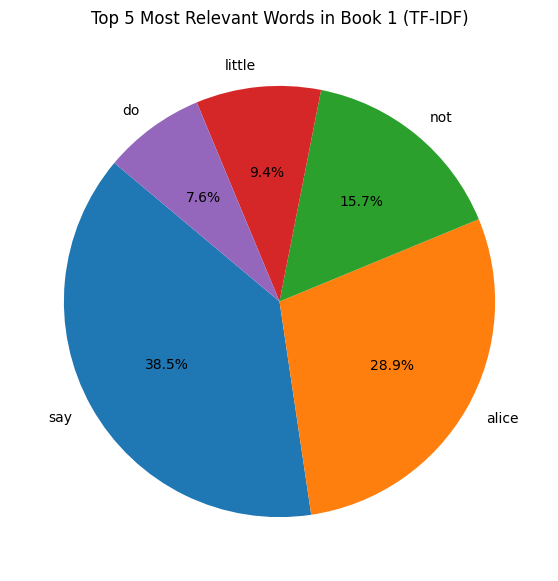

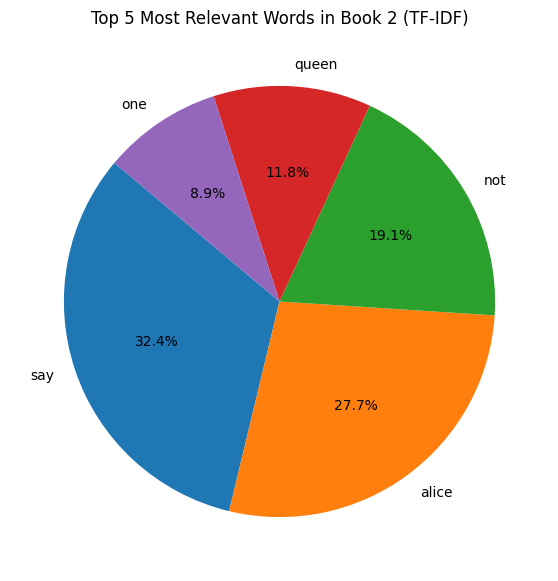

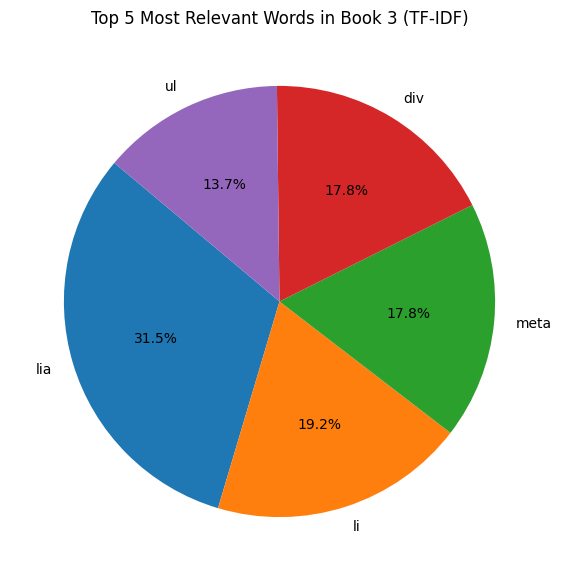

In [93]:
# Generate pie charts for each book
for i, top_words in enumerate(top_words_per_book):
    if top_words.empty:
        print(f"⚠ No significant words found for Book {i+1}, skipping display.")
        continue

    # Extract words (labels) and corresponding TF-IDF scores (values)
    labels = top_words.index.tolist()  # Top 5 words
    values = top_words.values.tolist()  # Corresponding TF-IDF scores

    # Plot pie chart
    plt.figure(figsize=(7, 7))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f"Top 5 Most Relevant Words in Book {i+1} (TF-IDF)")
    plt.show()
